참고: https://wikidocs.net/94600  
https://github.com/threegenie/sentiment_project/blob/main/sentiment_project_using_okt.ipynb

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


### 총 데이터 합치기

In [3]:
# 현재까지 모은 데이터 셋 
df = pd.read_csv('data/preprocessed_total_data.csv')

/var/folders/ph/hz48_2z57cj0x4b76mfndvkc0000gn/T/ipykernel_10757/1696380514.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/preprocessed_total_data.csv')


In [4]:
df # 총 데이터셋은 625539건

,RawText,ReviewScore,ProductName,labels,tokenized
0,머리결이 푸석해졌어요. 염색시간은 3시간정도 해야하는데 너무 번거로워요.,5,OO 헤나 파우더 100g 1개,0,"['머리', '결', '푸석해졌어요', '.', '염색', '3시간', '정도', ..."
1,천연헤나가 좋다는 건 알지만 흰머리 염색은 너무 번거롭고 오래걸리는 단점이 있네요....,5,OO 헤나 파우더 100g 1개,0,"['천', '연', '헤나', '좋다는', '건', '알', '흰', '머리', '..."
2,"다크 브라운으로 염색했는데, 발색이 블랙처럼 너무 어둡습니다. 염색 다음날 투명으로...",5,OO 헤나 파우더 100g 1개,0,"['다크', '브라운', '염색', '했는데', ',', '발색', '블랙', '처..."
3,염색할때 헤나를 계속 사용했는데요 ㅇㅇㅇ는 처음 사용해보네요. 염색은 잘 되는것 같...,4,OO 헤나 파우더 100g 1개,0,"['염색', '할', '헤나', '계속', '사용', '했는데요', 'ㅇㅇㅇ', '..."
4,"첫번째 주문입니다. 저렴한 가격도 아닌데, 염색이 잘 되지 않습니다. 사용하기도 불...",5,OO 헤나 파우더 100g 1개,0,"['첫', '번째', '주문', '입니다', '.', '저렴한', '가격', '아닌..."
...,...,...,...,...,...
625025,장마라그런가!!! 달지않아요,2,NaN,0,"['장마', '라', '런가', '!!!', '달', '지', '않아요']"
625026,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,5,NaN,1,"['다이슨', '케이스', '구매', '다이슨', '슈퍼소닉', '드라이기', '케..."
625027,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,5,NaN,1,"['로드샾', '사는것보다', '세배', '저렴하네요', 'ㅜㅜ', '자주', '용..."
625028,넘이쁘고 쎄련되보이네요~,5,NaN,1,"['넘', '이쁘고', '쎄련', '되', '보이네요', '~']"


### 단어와 길이 분포 확인하기

In [5]:
# 긍정, 부정 각 단어의 빈도수 계산 
negative_words = np.hstack(df[df.labels == 0]['tokenized'].values)
positive_words = np.hstack(df[df.labels == 1]['tokenized'].values)

In [6]:
# 부정 리뷰에 대해서 빈도수가 높은 상위 20개 단어들을 출력
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[("['배송', '너무', '느림']", 5), ("['사이즈', '작아요']", 5), ("['배송', '느려요']", 5), ("['배송', '너무', '느려요']", 5), ("['별로', '요']", 5), ("['빠른', '배송', '감사합니다']", 4), ("['배송', '늦어요']", 4), ("['생각', '별로', '에요']", 4), ("['배송', '엄청', '느림']", 4), ("['배송', '느립니다']", 4), ("['그냥', '그래요', '배송', '빨라요']", 4), ('[]', 4), ("['배송', '빨라요']", 4), ("['배송', '너무', '오래', '걸렸어요']", 4), ("['배송', '너무', '느립니다']", 3), ("['생각', '사이즈', '작아요']", 3), ("['너무', '작아요']", 3), ("['그냥', '그래요']", 3), ("['그냥', '그렇습니다']", 3), ("['입맛', '에는', '안', '맞아요']", 3)]


In [7]:
# 긍정 리뷰에 대해서 빈도수가 높은 상위 20개 단어들을 출력
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[("['배송', '빠르고', '제품', '좋아요']", 23), ("['배송', '빠르고', '좋아요']", 17), ("['배송', '빠르고', '제품', '좋네요']", 16), ("['배송', '빠르고', '상품', '좋아요']", 16), ("['배송', '빠르고', '향', '좋아요']", 16), ("['배송', '빠르고', '물건', '좋아요']", 13), ("['배송', '빠르고', '제품', '만족합니다']", 12), ("['배송', '빠르고', '좋아요', '~']", 12), ("['배송', '빠르고', '품질', '좋아요']", 11), ("['배송', '빠르고', '좋습니다']", 11), ("['잘', '사용', '있습니다']", 11), ("['상품', '배송', '만족합니다']", 11), ("['배송', '빠르고', '좋아요', '~~']", 10), ("['배송', '빠르고', '가성', '비', '좋아요']", 10), ("['배송', '빠르고', '상품', '만족합니다']", 10), ("['배송', '빠르고', '좋아요', '~~~']", 10), ("['배송', '빠르고', '제품', '좋습니다']", 10), ("['가성', '비', '좋은', '제품', '입니다']", 9), ("['배송', '빠르고', '좋아요', '^^']", 9), ("['잘', '사용', '있어요']", 9)]


긍정 리뷰의 평균 길이 : 84.022321502304
부정 리뷰의 평균 길이 : 127.9651687883002


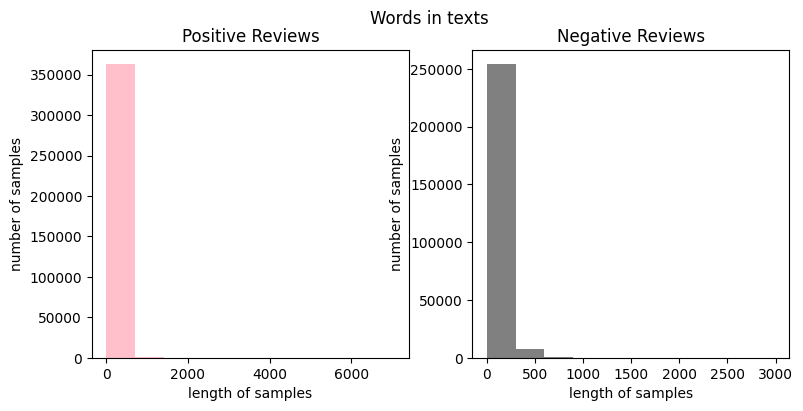

In [8]:
# 두 가지 경우에 대해서 각각 길이 분포를 확인
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(9,4))
text_len = df[df['labels']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='pink')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = df[df['labels']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='gray')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()


긍정 리뷰보다는 부정 리뷰가 좀 더 길게 작성된 경향이 있는 것 같다.

### 정수 인코딩

In [9]:
# 훈련 데이터와 테스트 데이터 분리하기
train_data, test_data = train_test_split(df, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 468772
테스트용 리뷰의 개수 : 156258


In [10]:
X_train = train_data['tokenized'].values
y_train = train_data['labels'].values
X_test= test_data['tokenized'].values
y_test = test_data['labels'].values

In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [12]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


단어 집합(vocabulary)의 크기 : 165578
등장 빈도가 1번 이하인 희귀 단어의 수: 87896
단어 집합에서 희귀 단어의 비율: 53.08434695430553
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.0431068387012858


In [13]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)


단어 집합의 크기 : 77684


In [14]:
tokenizer = Tokenizer(vocab_size, oov_token = 'unk') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [15]:
print(X_train[:3])

[[22, 3265, 2, 2, 613, 982], [3053, 32, 3900, 16, 63, 1130, 523, 6908, 1649, 10, 2, 2, 269, 35, 2, 2, 883, 1638, 9, 29, 280, 1730, 2, 2, 22, 261, 346, 23, 2, 2, 89, 21, 6, 2349, 32, 20, 2, 2], [115, 10736, 860, 4019, 849, 618, 2628, 6, 8547, 15]]


In [16]:
print(X_test[:3])

[[88, 2869, 5, 44, 3356], [1], [467, 50, 2175, 32, 61, 62, 161, 309, 10602, 101, 2163, 254, 5156, 131, 34, 229, 41, 2, 2]]


### 패딩

리뷰의 최대 길이: 1364
리뷰의 평균 길이: 17.975403821047333


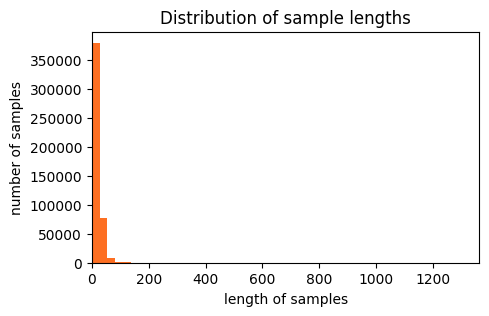

In [17]:
# 전체 데이터에서 가장 길이가 긴 리뷰와 전체 데이터의 길이 분포
max_length = max(len(review) for review in X_train)
print('리뷰의 최대 길이:', max_length)
print('리뷰의 평균 길이:', sum(map(len, X_train))/len(X_train))

plt.figure(figsize=(5, 3))  # 그래프 크기 조정
plt.hist([len(review) for review in X_train], bins=50, color='#FD6F22')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.title('Distribution of sample lengths')
plt.xlim(0, max_length)  # 가로 축 범위 조정
plt.show();


리뷰의 최대 길이 (제거 후): 684
리뷰의 평균 길이 (제거 후): 17.965927635691077


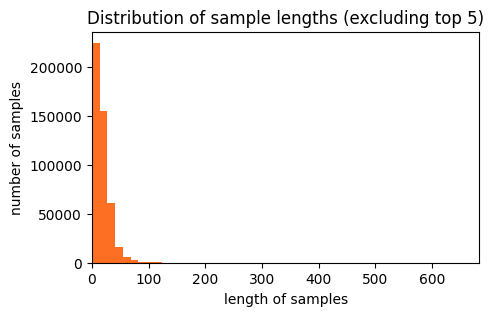

In [18]:
# 가장 긴 리뷰의 길이를 두 번 찾습니다.
max_lengths = sorted([len(review) for review in X_train], reverse=True)[:5]

# 최대값을 제외한 리뷰 길이들로 이루어진 리스트를 만듭니다.
filtered_lengths = [len(review) for review in X_train if len(review) not in max_lengths]

print('리뷰의 최대 길이 (제거 후):', max(filtered_lengths))
print('리뷰의 평균 길이 (제거 후):', sum(filtered_lengths) / len(filtered_lengths))

plt.figure(figsize=(5, 3))
plt.hist(filtered_lengths, bins=50, color='#FD6F22')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.title('Distribution of sample lengths (excluding top 5)')
plt.xlim(0, max(filtered_lengths))
plt.show()

전체적으로는 100이하의 길이를 가지는 것으로 보인다.

In [19]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))


In [20]:
# 몇 개의 샘플들을 온전히 보전할 수 있는지 확인
max_len = 350
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 350 이하인 샘플의 비율: 99.98976048057477


훈련용 리뷰의 99.9%가 350이하의 길이를 가진다. 훈련용 리뷰를 길이 350으로 패딩한다.

In [21]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

## GRU로 네이버 쇼핑 리뷰 감성 분류하기

In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [27]:
vocab_size

77684

In [28]:
# GPU 디바이스 사용 확인
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU를 사용합니다.")
else:
    print("GPU를 찾을 수 없습니다. CPU를 사용합니다.")

GPU를 사용합니다.


In [29]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

In [30]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.keras', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15


2024-04-19 10:03:00.030294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


5860/5860 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.8376 - loss: 0.3660
Epoch 1: val_acc improved from -inf to 0.89505, saving model to best_model.keras
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 237s 40ms/step - acc: 0.8376 - loss: 0.3660 - val_acc: 0.8950 - val_loss: 0.2636
Epoch 2/15
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.9095 - loss: 0.2340
Epoch 2: val_acc improved from 0.89505 to 0.90735, saving model to best_model.keras
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 235s 40ms/step - acc: 0.9095 - loss: 0.2340 - val_acc: 0.9074 - val_loss: 0.2375
Epoch 3/15
5859/5860 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.9250 - loss: 0.2015
Epoch 3: val_acc improved from 0.90735 to 0.90854, saving model to best_model.keras
5860/5860 ━━━━━━━━━━━━━━━━━━━━ 236s 40ms/step - acc: 0.9250 - loss: 0.2015 - val_acc: 0.9085 - val_loss: 0.2407
Epoch 4/15
5859/5860 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.9368 - loss: 0.1770
Epoch 4: val_acc improved from 0.90854 to 0.90965, saving model to best_model.keras
5860/5

In [ ]:
model.summary()

NameError: name 'model' is not defined

In [29]:
# 평가지표: 정확도
loaded_model = load_model('best_model.keras')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

4884/4884 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - acc: 0.9102 - loss: 0.2339

 테스트 정확도: 0.9105


In [27]:
# 평가지표: F1 Score
from sklearn.metrics import f1_score

# 모델 로드
loaded_model = load_model('best_model.keras')

# 테스트 데이터에 대한 예측 클래스 확률 예측
y_pred_prob = loaded_model.predict(X_test)

# 클래스 추정
y_pred = (y_pred_prob > 0.5).astype(int)

# F1 점수 계산
f1 = f1_score(y_test, y_pred)

# F1 점수 출력
print("\n 테스트 F1 Score: %.4f" % f1)


  16/4884 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step  

2024-05-01 14:04:12.319878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


4884/4884 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step

 테스트 F1 Score: 0.9231


### 리뷰 예측

In [28]:
test_data

,RawText,ReviewScore,ProductName,labels,tokenized
367669,선물해줬는데 너무 마음에 들어하네요,5,멜* 마운틴 스텝퍼 하체 실내 기구,1,"['선물', '해줬는데', '너무', '마음', '들어하네요']"
609714,귯귯이댜용,5,NaN,1,['귯귯이댜용']
59377,화이트 색상을 좋아하는데 구할 수 있어서 매우 좋았어요 듣던대로 기능들도 다양하고 ...,5,마샬 STANMORE II 해외구매,0,"['화이트', '색상', '좋아하는데', '할', '수', '있어서', '매우', ..."
388815,아들방에 사용하는데 무등등도있고 좋아해요,5,오* 무드1000 미니 가습기,1,"['아들', '방', '사용', '하는데', '무등등', '있고', '좋아해요']"
354222,처음 써보는데 느낌 좋아요~\n빠른배송 감사합니다,4,닥*바*오 온가족용 에코 로션 500g,1,"['처음', '써', '보는데', '느낌', '좋아요', '~', '\n', '빠른..."
...,...,...,...,...,...
146216,시누가 써보라고 주길래 써봤더니 좋네요 간편하고 향도 좋고 그래서 주문해요,5,OO 다** 변기크리너 리필 12매입 8개,0,"['시', '누가', '써', '보라', '고', '주길래', '써', '봤더니',..."
277175,향이 은은하네요 선물용으로 좋아요~|,5,에이** 네이처 디퓨저 200ml,1,"['향', '은은하네요', '선물', '용', '좋아요', '~|']"
181271,색상과 디자인이 그림으로 보는것과 많이 상이한것 같아 별루네요 신랑에게 선물했는데...,100,OO 스** 남성 샌들,1,"['색상', '디자인', '그림', '보는것과', '많이', '상이', '한', '..."
503853,종아리 보톡스 맞아도 효과없어서 전체적인 하비라...소프트로 샀습니다 ㅡ이거해주면 ...,2,NaN,0,"['종아리', '보톡스', '맞아도', '효과', '없어서', '전체', '적', ..."


with open('stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.replace('\n','') for x in stopwords] # stopword 파일의 줄바꿈 문자 제거

In [28]:
# 평가지표: 정확도
def sentiment_predict(new_sentence):
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = max_len)

    score = float(loaded_model.predict(pad_new))
    if(score > 0.5):
        return "{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100)
    else:
        return "{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100)

In [30]:
# 평가지표: F1 Score

def sentiment_predict_f1(new_sentence):
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen=max_len)

    # 모델의 예측 결과
    score = loaded_model.predict(pad_new)
    # 클래스 추정
    threshold = 0.5  # 임계값 설정
    y_pred = (score > threshold).astype(int)

    # F1 점수 계산
    f1 = f1_score([1], y_pred)  # 긍정 클래스에 대한 F1 점수 계산

    if y_pred == 1:
        return "{:.2f}% 확률로 긍정 리뷰입니다. (F1 Score: {:.2f})".format(score[0][0] * 100, f1)
    else:
        return "{:.2f}% 확률로 부정 리뷰입니다. (F1 Score: {:.2f})".format((1 - score[0][0]) * 100, f1)


In [31]:
print(test_data.loc[test_data['labels'] == 1, 'RawText'].tolist()[2])
example = test_data.loc[test_data['labels'] == 1, 'tokenized'].tolist()[2]
print(sentiment_predict_f1(example))

아들방에 사용하는데 무등등도있고 좋아해요
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
98.37% 확률로 긍정 리뷰입니다. (F1 Score: 1.00)


In [32]:
print(test_data.loc[test_data['labels'] == 0, 'RawText'].tolist()[3])
example = test_data.loc[test_data['labels'] == 0, 'tokenized'].tolist()[3]
print(sentiment_predict_f1(example))

싼맛에 쓰는거죠. 이쁘거나 튼튼하거나 그렇지는 않습니다. 마감도 그리 좋지는 않네요. 펴지니까 그냥저냥 쓸려구요..
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
96.58% 확률로 부정 리뷰입니다. (F1 Score: 0.00)
